In [65]:
import pandas as pd

from googleapiclient.discovery import build
from IPython.display import JSON

from config import Youtube_API_Key
#from api_methods import get_channel_stats, get_video_ids

import seaborn as sns
import matplotlib.pyplot as plt

In [66]:
# Get credentials and create an API client
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=Youtube_API_Key)

Chanel id converter : https://www.streamweasels.com/tools/youtube-channel-id-and-user-id-convertor/

Youtube TR Most Popular Videos Analysis

In [67]:
request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        maxResults=10,
        regionCode="TR"
    )
response = request.execute()
#print(response) for clear output ı write as an comment of code.

Json code converter :

- https://www.objgen.com/json/local/rh49EaBVJ
- https://jsonformatter.org/json-editor

Videos Like According to the views

In [68]:
#For first row at TR popular videos
statistics = response["items"][0]['statistics']
statistics


{'viewCount': '1546384',
 'likeCount': '14411',
 'favoriteCount': '0',
 'commentCount': '1388'}

Method for Fuction

In [69]:
def get_most_pop_Youtube_TR(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers.google.com/youtube/v3/docs/channels/list#usage you can look detailly.
    
    request = youtube.videos().list(
        part="snippet,contentDetails,statistics",
        chart="mostPopular",
        regionCode="TR",
    )
    response = request.execute()


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'channelName': item['snippet']['title'],
                'PublishTime': item['snippet']['publishedAt'],
                'views': item['statistics']['viewCount'],
                'LikeCount':item['statistics']['likeCount'],
                'CommentCount':item['statistics']['commentCount'],
                'Duration': item['contentDetails']['duration'],
                'videoID': item['id']
        }
        all_data.append(data)

    return pd.DataFrame(all_data)

In [70]:
TR_Youtube_Most_Pop=get_most_pop_Youtube_TR(youtube)

In [71]:
TR_Youtube_Most_Pop.head()

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1546384,14411,1388,PT2H14M6S,_LVk6qMiF5U
1,"Kızıl Goncalar 3. Bölüm 1. Fragmanı | ""Anası R...",2023-12-28T16:04:56Z,683784,9897,1024,PT47S,4vmbDdll96g
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,901619,41163,2302,PT28M,aWaJSJmsy3c
3,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2951899,35351,5112,PT2H4M12S,5nXRi1dkRps
4,HEDİYELİK YILBAŞI ÇİKOLATASI YAPTIM! kolay tar...,2023-12-28T15:55:26Z,374366,13800,291,PT33S,dw9gDNZKHR0


In [72]:
TR_Youtube_Most_Pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channelName   5 non-null      object
 1   PublishTime   5 non-null      object
 2   views         5 non-null      object
 3   LikeCount     5 non-null      object
 4   CommentCount  5 non-null      object
 5   Duration      5 non-null      object
 6   videoID       5 non-null      object
dtypes: object(7)
memory usage: 408.0+ bytes


In [73]:
#Turn object value types to numeric by pandas
TR_Youtube_Most_Pop[['views', 'LikeCount','CommentCount']] = TR_Youtube_Most_Pop[['views', 'LikeCount','CommentCount']].apply(pd.to_numeric, errors='coerce')
# The errors='coerce' argument is used to handle non-convertible values by replacing them with NaN.We dont have but ı put for an example

In [74]:
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1546384,14411,1388,PT2H14M6S,_LVk6qMiF5U
1,"Kızıl Goncalar 3. Bölüm 1. Fragmanı | ""Anası R...",2023-12-28T16:04:56Z,683784,9897,1024,PT47S,4vmbDdll96g
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,901619,41163,2302,PT28M,aWaJSJmsy3c
3,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2951899,35351,5112,PT2H4M12S,5nXRi1dkRps
4,HEDİYELİK YILBAŞI ÇİKOLATASI YAPTIM! kolay tar...,2023-12-28T15:55:26Z,374366,13800,291,PT33S,dw9gDNZKHR0


In [75]:
#Sort values according to the views, because of numeric value we finished clearly. Careful :)
TR_Youtube_Most_Pop.sort_values(by=['views'], ascending=False,inplace=True)
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
3,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2951899,35351,5112,PT2H4M12S,5nXRi1dkRps
0,Sandık Kokusu 4.Bölüm @sandikkokusudizi,2023-12-27T21:01:41Z,1546384,14411,1388,PT2H14M6S,_LVk6qMiF5U
2,Neden Ayrıldık? Nasıl Barıştık? Sorularınızı Y...,2023-12-27T15:29:18Z,901619,41163,2302,PT28M,aWaJSJmsy3c
1,"Kızıl Goncalar 3. Bölüm 1. Fragmanı | ""Anası R...",2023-12-28T16:04:56Z,683784,9897,1024,PT47S,4vmbDdll96g
4,HEDİYELİK YILBAŞI ÇİKOLATASI YAPTIM! kolay tar...,2023-12-28T15:55:26Z,374366,13800,291,PT33S,dw9gDNZKHR0


In [76]:
# Define a function to limit the number of characters for channelname limitation
def limit_characters(channelName, max_length=25):
    return channelName[:max_length] 


In [77]:
# Apply the function to the 'text' column
TR_Youtube_Most_Pop['channelName'] = TR_Youtube_Most_Pop['channelName'].apply(limit_characters)

# Display the updated DataFrame
TR_Youtube_Most_Pop

,channelName,PublishTime,views,LikeCount,CommentCount,Duration,videoID
3,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,2951899,35351,5112,PT2H4M12S,5nXRi1dkRps
0,Sandık Kokusu 4.Bölüm @sa,2023-12-27T21:01:41Z,1546384,14411,1388,PT2H14M6S,_LVk6qMiF5U
2,Neden Ayrıldık? Nasıl Bar,2023-12-27T15:29:18Z,901619,41163,2302,PT28M,aWaJSJmsy3c
1,Kızıl Goncalar 3. Bölüm 1,2023-12-28T16:04:56Z,683784,9897,1024,PT47S,4vmbDdll96g
4,HEDİYELİK YILBAŞI ÇİKOLAT,2023-12-28T15:55:26Z,374366,13800,291,PT33S,dw9gDNZKHR0


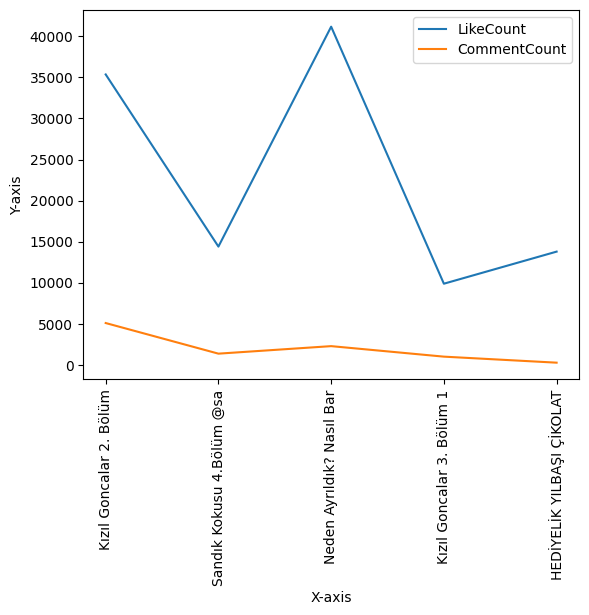

In [78]:

# Create a line plot with three lines
plt.plot(TR_Youtube_Most_Pop['channelName'], TR_Youtube_Most_Pop['LikeCount'], label='LikeCount')
plt.plot(TR_Youtube_Most_Pop['channelName'], TR_Youtube_Most_Pop['CommentCount'], label='CommentCount')


# Add labels and a legend

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Rotate x-axis labels
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
# Show the plot
plt.show()


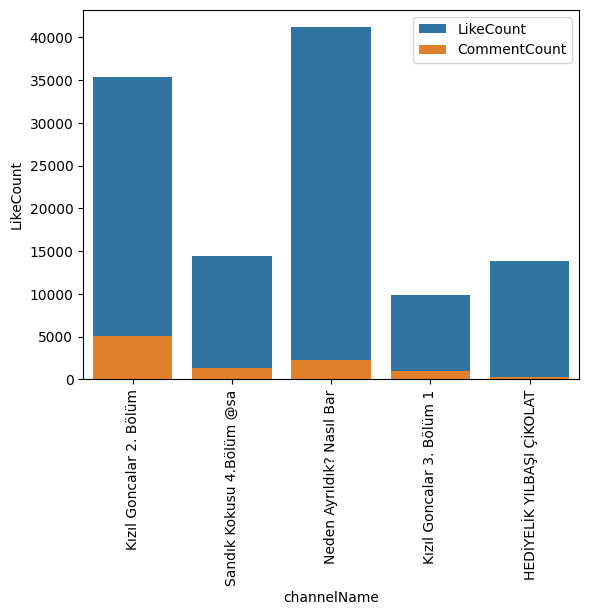

In [79]:
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="LikeCount",label="LikeCount")
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="CommentCount",label="CommentCount")
plt.legend(loc='best') # to see legend
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
# Show the plot
plt.show()

#Output: As you see, in movies views are higher than classic short videos but like count is almost equal to major view channelname.

In [80]:
TR_Youtube_Most_Pop.insert(2,'LikeC/Views',TR_Youtube_Most_Pop['LikeCount'].astype(int) / TR_Youtube_Most_Pop['views'].astype(int))


In [81]:
TR_Youtube_Most_Pop.sort_values(by=['LikeC/Views'])

,channelName,PublishTime,LikeC/Views,views,LikeCount,CommentCount,Duration,videoID
0,Sandık Kokusu 4.Bölüm @sa,2023-12-27T21:01:41Z,0.009319,1546384,14411,1388,PT2H14M6S,_LVk6qMiF5U
3,Kızıl Goncalar 2. Bölüm,2023-12-25T19:32:41Z,0.011976,2951899,35351,5112,PT2H4M12S,5nXRi1dkRps
1,Kızıl Goncalar 3. Bölüm 1,2023-12-28T16:04:56Z,0.014474,683784,9897,1024,PT47S,4vmbDdll96g
4,HEDİYELİK YILBAŞI ÇİKOLAT,2023-12-28T15:55:26Z,0.036862,374366,13800,291,PT33S,dw9gDNZKHR0
2,Neden Ayrıldık? Nasıl Bar,2023-12-27T15:29:18Z,0.045655,901619,41163,2302,PT28M,aWaJSJmsy3c


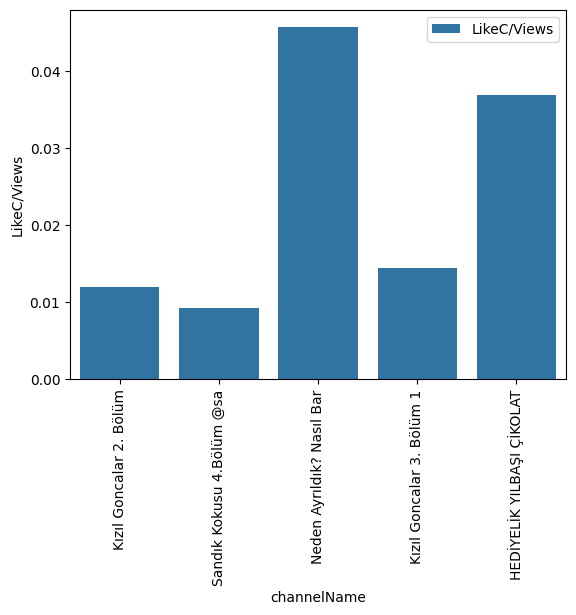

In [82]:
sns.barplot(TR_Youtube_Most_Pop, x="channelName", y="LikeC/Views",label="LikeC/Views")
# Rotate x-axis labels
plt.xticks(rotation=90)  # You can adjust the rotation angle as needed
plt.show()

#Output : I want to anlyze LikeC/Views ratio. And daily videos are higher than movies.

In [107]:
MP=TR_Youtube_Most_Pop.sort_values(by=['LikeC/Views'])

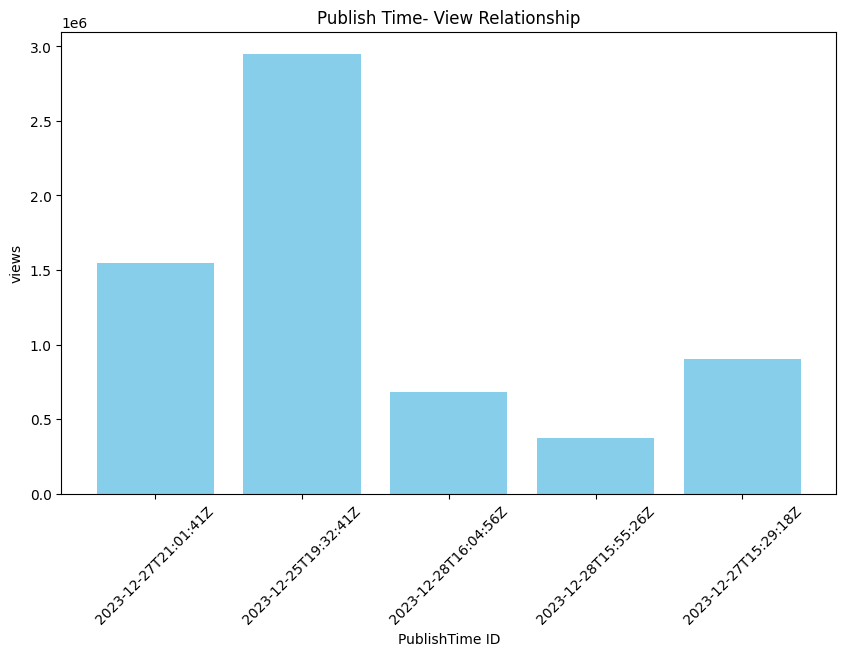

In [108]:
plt.figure(figsize=(10, 6))
plt.bar(MP['PublishTime'], MP['views'], color='skyblue')
plt.xlabel('PublishTime ID')
plt.ylabel('views')
plt.title('Publish Time- View Relationship')
plt.xticks(rotation=45)
plt.show()

#Output: We cant say directly earlier time equals to high view.

I will analyze the ;
- higher viewer channel          : Kızıl Goncalar 2.bölüm         Video ID :5nXRi1dkRps
- higher like/view ratio Channel : Neden Ayrıldık?Nasıl Barıstık  Video ID :aWaJSJmsy3c

#### Kızıl Goncalar

CommentThreads by Video_ID

In [83]:
request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="5nXRi1dkRps" # KIzıl Goncalar Video ID
    )
response = request.execute()

#print(response) for clear output ı write as an comment of code.

Json code converter :

- https://www.objgen.com/json/local/rh49EaBVJ
- https://jsonformatter.org/json-editor

Method For Function 

In [84]:
def get_commentThreads(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers-dot-devsite-v2-prod.appspot.com/youtube/v3/docs/commentThreads/list?apix=true#usage you can look detailly.
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
         maxResults=5000,
        videoId="5nXRi1dkRps" # KIzıl Goncalar Video ID
    )
    response = request.execute()

    #print(response) for clear output ı write as an comment of code.


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'textDisplay':item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'authorDisplayName': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'likeCount':item['snippet']['topLevelComment']['snippet']['likeCount']

        }
        all_data.append(data)
    return pd.DataFrame(all_data)



Method for Get Comments

In [85]:
# Get comments for the specified video
comments = []
nextPageToken = None

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="5nXRi1dkRps",
        maxResults=100,  # Adjust as needed
        pageToken=nextPageToken
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    nextPageToken = response.get("nextPageToken")

    if not nextPageToken:
        break

# Print or use the retrieved comments
for comment in comments:
    print(comment)

Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yorumlarınızı bekliyorum👇👇
tekkeyi de cok guzel yapmislar. harika..
Mert yazicioglunun sahnelerini çoğaltin lütfennn
oyuncu kadrosu iyi, senaryo iyi, cekimler iyi..Insallah iyi gider diger diziler gibi bir sure sonra sacmalamaya baslamaz..tabi ulkede her seyde bir ergenek.n kokusu var artik ama o kadar olacak yapacak bisey yok..
Bu dizide sadece tarikatlara degil her iki tarafada ince giydirme var anlayana birde yarası olan gocunsun
Akkoyunları bağlı oldukları tarikatları anlatan cesur dizi
Bence devam etmeli
dizi hayatın gerçeklerini anlatıyor kimse gocunmasın tvden soğuduğumuz bu günlerde birakın adam gibi bir dizi izleyelim
Muthis bir emek, herkesin  emegine saglik
salakmisiniz yahu, ne sacma birsey bu?
Kimin gerceklerini anlatiyor tam adres verinde bilelim. Yoksa sakalli tesetturlu tasavvuf ehli tum insanlari burdaki gibi zannetmeyecek mi insanlar. Tabiiki zannedecekler amaçta bu zaten. Diziden rahatsiz olanlarin rahatsiz olma sebebi de b

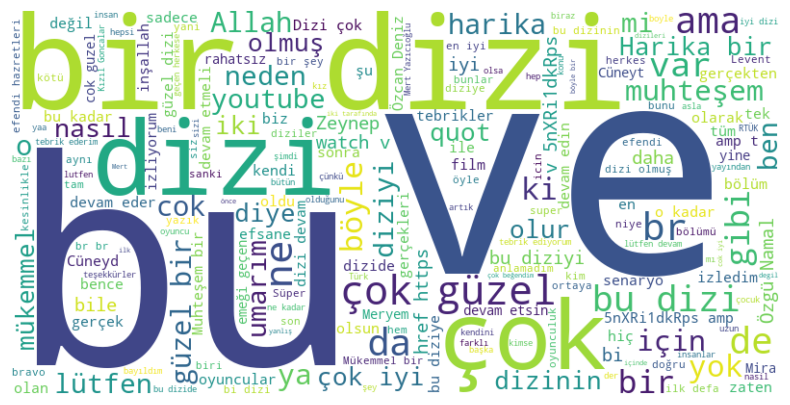

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'comments' is your list of comments

# Combine all comments into a single string
all_comments_text = ' '.join(comments)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [87]:
get_commentThreads(youtube).sort_values(by="likeCount",ascending=False)


# Chanel ID =  'UCvMf-BavX_3YjG-JPrpPqLw


,textDisplay,authorDisplayName,likeCount
0,Kızıl Goncalar 2. bölümü nasıl buldunuz?<br>Yo...,@KizilGoncalarDizisi,2147
90,"REYTİNG REKORU kırıyor <br><a href=""http://www...",@demirvideoofficial,2
61,Devam etmeli,@meryemoter9610,2
62,Mükemmel bir dizi,@user-eg4dd2nr1f,2
44,"Lütfen bu diziyi bittirmeyin, devam etsin tüm ...",@mardinmardin2987,2
...,...,...,...
32,"Valla dizi harika, kendimi kaptirdim gidiyorum...",@kevint7476,0
31,Muhteşem bir dizi 🥺❤️❤️❤️👏👏,@asmaaali162,0
30,Boyle diziler neden cogaldi iyice araplaştık b...,@ekinshn5217,0
29,"Etkileyici bir dizi,çooook güzel bir anlatım var",@busraarslan1433,0


##### Channel Sections Analysis by Channel ID 

In [88]:
request = youtube.channelSections().list(
        part="snippet,contentDetails",
        channelId="UCvMf-BavX_3YjG-JPrpPqLw"
    )
response = request.execute()

#print(response) for clear output ı write as an comment of code.

In [89]:
def get_ChannelSections(youtube):
    all_data = []
    
    request = youtube.channelSections().list(
        part="snippet,contentDetails",
        channelId='UCvMf-BavX_3YjG-JPrpPqLw'
    )
    response = request.execute()


    for item in response.get("items", []):
        data = {'ID':item["id"],
                'Type': item["snippet"]["type"]}
        all_data.append(data)
    return pd.DataFrame(all_data)

In [90]:
get_ChannelSections(youtube)

,ID,Type
0,UCvMf-BavX_3YjG-JPrpPqLw.jNQXAC9IVRw,singleplaylist
1,UCvMf-BavX_3YjG-JPrpPqLw.LeAltgu_pbM,singleplaylist
2,UCvMf-BavX_3YjG-JPrpPqLw.nGzAI5pLbMY,singleplaylist
3,UCvMf-BavX_3YjG-JPrpPqLw.__WLXNpu6u8,singleplaylist
4,UCvMf-BavX_3YjG-JPrpPqLw.Zx4DA4xg9IM,recentuploads
5,UCvMf-BavX_3YjG-JPrpPqLw.MykmTeTiooA,singleplaylist
6,UCvMf-BavX_3YjG-JPrpPqLw.iJLXf_7B368,singleplaylist
7,UCvMf-BavX_3YjG-JPrpPqLw.UgY69lf0UCE,singleplaylist
8,UCvMf-BavX_3YjG-JPrpPqLw.ebKlgRwnpFY,singleplaylist
9,UCvMf-BavX_3YjG-JPrpPqLw.aqsRo9JYx5M,channelsectiontypeundefined


#### Neden Ayrıldık? Nasıl Barıştık?

In [91]:
def get_commentThreads(youtube):
    all_data = []

# This request method is defined as below . You can include what you want in part. 
    # https://developers-dot-devsite-v2-prod.appspot.com/youtube/v3/docs/commentThreads/list?apix=true#usage you can look detailly.
    
    request = youtube.commentThreads().list(
        part="snippet,replies",
         maxResults=5000,
        videoId="aWaJSJmsy3c" # Nasıl Ayrıldık? Nasıl Barıştık Video ID
    )
    response = request.execute()

    #print(response) for clear output ı write as an comment of code.


    # loop through items in response
    #json webpage ( https://jsonformatter.org/json-editor) is sooo good to anayze.
    for item in response["items"]:
        data = {'textDisplay':item['snippet']['topLevelComment']['snippet']['textDisplay'],
                'authorDisplayName': item['snippet']['topLevelComment']['snippet']['authorDisplayName'],
                'likeCount':item['snippet']['topLevelComment']['snippet']['likeCount'],
                'publishedAt':item['snippet']['topLevelComment']['snippet']['publishedAt'],
                'totalReplyCount':item['snippet']['totalReplyCount']
        }
        all_data.append(data)
    return pd.DataFrame(all_data)

In [92]:
get_commentThreads(youtube)

,textDisplay,authorDisplayName,likeCount,publishedAt,totalReplyCount
0,Güzel yorumlarınız için çok teşekkür ederiz o ...,@BetulCakmak5,1718,2023-12-27T16:08:00Z,58
1,Yaza nişan yaparlar dedi dersiniz,@NB-jf1hc,0,2023-12-29T08:30:26Z,0
2,Uzun ilişkilerde evlilik olmadığı sürece ayrıl...,@NB-jf1hc,0,2023-12-29T08:26:23Z,0
3,COK MUTLU OLDUM.COCUKLUGUM SİZİNLE GECTİ GERCE...,@senuberr,1,2023-12-29T08:15:55Z,0
4,Ya cidden mi İkiniz çok yakişiyorsunuz❤,@lala_3604,0,2023-12-29T08:14:22Z,0
...,...,...,...,...,...
95,slikon yuvasina dönmüs buda haaa,@bugraocaal,1,2023-12-28T19:42:03Z,1
96,Prime ilişki değil PRİM ilişki,@AcizaneFakir,1,2023-12-28T19:41:25Z,1
97,🎉,@Asya_Simsek,0,2023-12-28T19:41:21Z,0
98,40k dan 790k+ ya 😃,@tastanavsar8472,0,2023-12-28T19:40:46Z,0


In [113]:
# Get comments for the specified video
comments = []
nextPageToken = None

while True:
    request = youtube.commentThreads().list(
        part="snippet,replies",
        videoId="aWaJSJmsy3c",
        maxResults=100,  # Adjust as needed
        pageToken=nextPageToken
    )
    response = request.execute()

    for item in response["items"]:
        comment = item["snippet"]["topLevelComment"]["snippet"]["textDisplay"]
        comments.append(comment)

    nextPageToken = response.get("nextPageToken")

    if not nextPageToken:
        break

# Print or use the retrieved comments
for comment in comments:
    print(comment)  # for clear output ı write as an comment of code.

Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍
bi süre sonra tekrar ayrılıp paran bitince barışırsın heralde😂
Max 75 k izlemeden sonra 900 k izlenme betule iyi gelir
Ünlü iliskilerinde ayrılık olunca kadin direkt suçlanıyor. Barıştılar yine kizin parasi bitmiş gelmis dendi. Saçmalık
Sizi yine beraber görmek çok güzel  sakın ayrılmayın❤😢
Takipçin mi azaldı
Neden ayrıldık ünlü oldum neden barıştık param bitti
Ben bu ilişkiye inanmıyorum abi kusura bakmayın yine çakılırlar çevremdeki tecrübelere dayanarak söylüyorum yıpratmaya devam ediyolar kendilerini malesef
O KADAR MUTLU OLDUM Kİİİİİİ ANLATAMAMMM MAŞALLAH UMARIM BİRBİRİNİZİN TATİLİ OLDUĞU BİR ÖMÜR GEÇİRİRSİNİZ &lt;3
Yaza nişan yaparlar dedi dersiniz
Uzun ilişkilerde evlilik olmadığı sürece ayrılık kaçınılmazdır o da ilişkinin monotonluğu açısından yanlış anlaşılmasın . 1 yıllık evlilik 5 yıllık sevgililiğe bedel siz de zaten çok dip dibe olduğunuz için ayrılmışsınız evlilik size iyi gelme

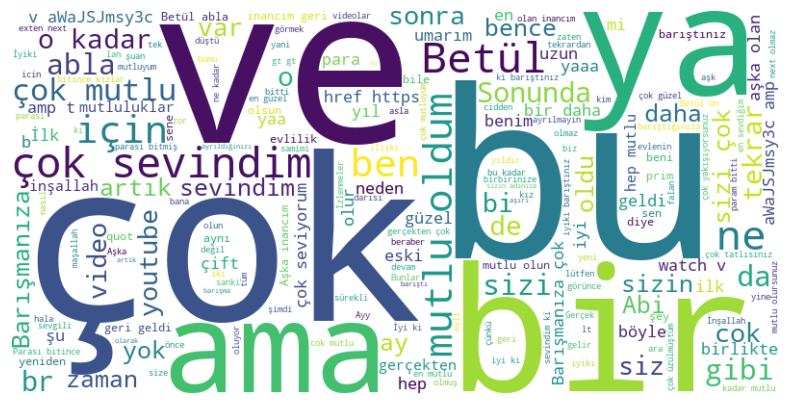

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all comments into a single string
all_comments_text = ' '.join(comments)

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments_text)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

In [ ]:
get_commentThreads(youtube).sort_values(by="likeCount",ascending=False).head(100)

{'kind': 'youtube#commentThreadListResponse', 'etag': 'MH4m-4F-WpdNlqpTIPNtBLQnw3E', 'nextPageToken': 'Z2V0X25ld2VzdF9maXJzdC0tQ2dnSWdBUVZGN2ZST0JJRkNJa2dHQUFTQlFpSUlCZ0FFZ1VJaHlBWUFCSUZDSjBnR0FFU0JRaWVJQmdBR0FBaURnb01DUHlWdDZ3R0VQQy1zNEFE', 'pageInfo': {'totalResults': 100, 'resultsPerPage': 100}, 'items': [{'kind': 'youtube#commentThread', 'etag': 'BE4qkm4xWl3UPvk7inO3dAgJLkY', 'id': 'Ugwht1mrOPLGxPG--SZ4AaABAg', 'snippet': {'channelId': 'UCd7R-ZnmxqF75FpTQpl09EQ', 'videoId': 'aWaJSJmsy3c', 'topLevelComment': {'kind': 'youtube#comment', 'etag': '0VBMS20Uk_YM_OdvNjNM3TfjuLo', 'id': 'Ugwht1mrOPLGxPG--SZ4AaABAg', 'snippet': {'channelId': 'UCd7R-ZnmxqF75FpTQpl09EQ', 'videoId': 'aWaJSJmsy3c', 'textDisplay': 'Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍', 'textOriginal': 'Güzel yorumlarınız için çok teşekkür ederiz o kadar mutlu ediyor ki bizi ❤️ iyi ki varsınız 🤍', 'authorDisplayName': '@BetulCakmak5', 'authorProfileImageUrl': 'https://yt3.

,textDisplay,authorDisplayName,likeCount,publishedAt,totalReplyCount
0,Güzel yorumlarınız için çok teşekkür ederiz o ...,@BetulCakmak5,1714,2023-12-27T16:08:00Z,57
67,Nedense bana suan cok yapmacik noye geldi anla...,@sevcantorenuludag5401,5,2023-12-28T21:02:32Z,0
60,ya bizene siz kimsiniz ve trendlerde ne işiniz...,@cananktss2592,4,2023-12-28T21:29:14Z,1
68,İzlenmeleri düşmüş estetik parasına ihtiyaci var,@GhostDinleyin,4,2023-12-28T21:01:56Z,1
70,Barışmalarına çok sevindim ama bir sorun var y...,@kronoss5890,4,2023-12-28T20:57:27Z,0
...,...,...,...,...,...
63,"naber , iyiymisin , selam",@JONW_,0,2023-12-28T21:14:28Z,0
64,Önüme eski videoları çıktı sandım o kadar sevi...,@semakucuksarii,0,2023-12-28T21:13:42Z,0
65,Siz sevgili miydiniz inanamıyorum 😮 artık hep ...,@duyguc7805,0,2023-12-28T21:10:28Z,0
17,Ohbee😊😊,@pervin4399,0,2023-12-29T06:11:07Z,0
